# Cleaning and Splitting TWOSIDES Data

In this code I clean the data by removing all small noncovalent molecules and salts from the smiles. Some drugs listed in the database were made up completely of salts and those smiles and any drug paired with them were removed from the dataset. I then train test split the clean and dirty smiles datased and uploaded them to the Drive.

In [ ]:
# Imports

%%capture
!pip install rdkit==2022.3.4
!pip install deepchem==2.5.0

import scipy
import numpy as np
import pandas as pd
import deepchem as dc
from sklearn.model_selection import train_test_split
from rdkit import Chem
from rdkit.Chem import Draw

In [ ]:
# Connect to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Read processed Twosides database from google drive
df = pd.read_csv('/content/drive/My Drive/kf_ddi_df.csv')
df.head()

,Unnamed: 0,Drug1_ID,Drug1,Drug2_ID,Drug2,Y
0,0,CID000005090,CS(=O)(=O)C1=CC=C(C=C1)C2=C(C(=O)OC2)C3=CC=CC=C3,CID000004946,CC(C)NCC(COC1=CC=CC2=CC=CC=C21)O,1
1,1,CID000005090,CS(=O)(=O)C1=CC=C(C=C1)C2=C(C(=O)OC2)C3=CC=CC=C3,CID000004107,COC1=CC=CC=C1OCC(COC(=O)N)O,0
2,2,CID000005090,CS(=O)(=O)C1=CC=C(C=C1)C2=C(C(=O)OC2)C3=CC=CC=C3,CID000005556,CC1=NN=C2N1C3=C(C=C(C=C3)Cl)C(=NC2)C4=CC=CC=C4Cl,1
3,3,CID000005090,CS(=O)(=O)C1=CC=C(C=C1)C2=C(C(=O)OC2)C3=CC=CC=C3,CID000002156,CCCCC1=C(C2=CC=CC=C2O1)C(=O)C3=CC(=C(C(=C3)I)O...,0
4,4,CID000005090,CS(=O)(=O)C1=CC=C(C=C1)C2=C(C(=O)OC2)C3=CC=CC=C3,CID000002907,C1CNP(=O)(OC1)N(CCCl)CCCl,0


In [ ]:
# Train test split dirty data
ddi_train, ddi_test = train_test_split(df, test_size = 0.2, random_state = 0)

In [ ]:
# Upload train and testing data for dirty dataset
ddi_train.to_csv("dirty_train_ddi.csv")
!cp dirty_train_ddi.csv "/content/drive/My Drive/"
ddi_test.to_csv("dirty_test_ddi.csv")
!cp dirty_test_ddi.csv "/content/drive/My Drive/"

In [ ]:
# Count the Dirty Smiles containing salts
count_with_brackets = df['Drug1'].str.contains('\.').sum()

# Display the count of items containing '['
print(f"Number of items containing '.': {count_with_brackets}")

Number of items containing '[': 4256


Items containing '.':
{'CCP(CC)CC.CC(=O)OCC1C(C(C(C(O1)[S-])OC(=O)C)OC(=O)C)OC(=O)C.[Au+]', 'CN1C2=C(C(=O)N(C1=O)C)NC=N2.CN1C2=C(C(=O)N(C1=O)C)NC=N2.C(CN)N', '[O-2].[O-2].[O-2].[As+3].[As+3]', '[Na+].[Cl-]', 'C1CC(C1)(C(=O)O)C(=O)O.N.N.[Pt]', 'CNC(=O)CN(CCN(CCN(CC(=O)NC)CC(=O)[O-])CC(=O)[O-])CC(=O)[O-].O.[Gd+3]', '[Li+].[AlH4-]', 'CC1=CC2=C(C=C1C)N(C=N2)C3C(C(C(O3)CO)OP(=O)(O)OC(C)CNC(=O)CCC4(C(C5C6(C(C(C(=N6)C(=C7C(C(C(=N7)C=C8C(C(C(=N8)C(=C4[N-]5)C)CCC(=O)N)(C)C)CCC(=O)N)(C)CC(=O)N)C)CCC(=O)N)(C)CC(=O)N)C)CC(=O)N)C)O.[C-]#N.[Co+2]', 'C1CCC(C(C1)[NH-])[NH-].C(=O)(C(=O)O)O.[Pt+2]', '[Cl-].[K+]', 'CC(C(=O)O)N.CC(=O)O.C1=CC(=CC=C1CC(C(=O)O)N)O.C(CCN)CC(C(=O)O)N.C(CC(=O)O)C(C(=O)O)N', 'O.O.O.O.O.O.[Cl-].[Cl-].[Ca+2]', 'CCC(C)C1C(CCC2(O1)CC3CC(O2)CC=C(C(C(C=CC=C4COC5C4(C(C=C(C5O)C)C(=O)O3)O)C)OC6CC(C(C(O6)C)OC7CC(C(C(O7)C)O)OC)OC)C)C.CC1CCC2(CC3CC(O2)CC=C(C(C(C=CC=C4COC5C4(C(C=C(C5O)C)C(=O)O3)O)C)OC6CC(C(C(O6)C)OC7CC(C(C(O7)C)O)OC)OC)C)OC1C(C)C', 'C(=O)([O-])[O-].C(=O)([O-])[O-].C(=O)([O-]

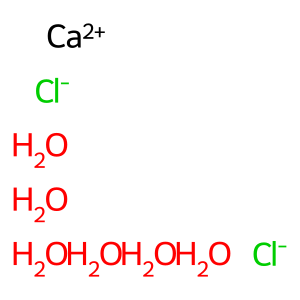

In [ ]:
items_with_dot = df[df['Drug2'].str.contains('\.')]['Drug2'].tolist()

# Display the list of items containing '.'
print("Items containing '.':")
print(set(items_with_dot))

# Used to check relevant structures
mol = Chem.MolFromSmiles('O.O.O.O.O.O.[Cl-].[Cl-].[Ca+2]')
Draw.MolToImage(mol)

In [ ]:
# The dirtiest smiles to be completely removed from the dataset
rm_list = ['O.O.O.O.O.O.[Cl-].[Cl-].[Ca+2]', '[Cl-].[K+]', '[Li+].[AlH4-]', '[Na+].[Cl-]', '[O-2].[O-2].[O-2].[As+3].[As+3]']

# Filter accross both Drug 1 and Drug 2, removing the smiles in the above list
filtered_df_1 = df[~df['Drug1'].isin(rm_list)]
filtered_df = filtered_df_1[~filtered_df_1['Drug2'].isin(rm_list)]

# Display the filtered Dataframe lengths
print(len(df))
print(len(filtered_df_1))
print(len(filtered_df))

173166
171316
170236


In [ ]:
# Count the number of salt-containing smiles in Drug 1 Column
count = filtered_df['Drug1'].apply(lambda x: x.count('.')).sum()
print(f"The number of canonical smiles containing multiple components is {count}.")

The number of canonical smiles containing multiple components is 7036.


In [ ]:
# Remove the salt components from the smiles for Drug 1
filtered_df['Drug1'] = filtered_df['Drug1'].apply(lambda x: max(x.split('.'), key=len))
count = filtered_df['Drug1'].apply(lambda x: x.count('.')).sum()
print(f"The number of canonical smiles containing multiple components is {count}.")

The number of canonical smiles containing multiple components is 0.


<ipython-input-55-143a1370b548>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Drug1'] = filtered_df['Drug1'].apply(lambda x: max(x.split('.'), key=len))


In [ ]:
# Count the number of salt-containing smiles in Drug 2 Column
count = filtered_df['Drug2'].apply(lambda x: x.count('.')).sum()
print(f"The number of canonical smiles containing multiple components is {count}.")

The number of canonical smiles containing multiple components is 29693.


In [ ]:
# Remove the salt components from the smiles for Drug 2
filtered_df['Drug2'] = filtered_df['Drug2'].apply(lambda x: max(x.split('.'), key=len))
count = filtered_df['Drug1'].apply(lambda x: x.count('.')).sum()
print(f"The number of canonical smiles containing multiple components is {count}.")

The number of canonical smiles containing multiple components is 0.


<ipython-input-57-94f46caf1742>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Drug2'] = filtered_df['Drug2'].apply(lambda x: max(x.split('.'), key=len))


In [ ]:
# Train test split clean data
clean_ddi_train, clean_ddi_test = train_test_split(filtered_df, test_size=0.2, random_state=0)
print(len(clean_ddi_train))
print(len(clean_ddi_test))

136188
34048


In [ ]:
# Upload train and testing data for dirty dataset
clean_ddi_train.to_csv("clean_train_ddi.csv")
!cp clean_train_ddi.csv "/content/drive/My Drive/"
clean_ddi_test.to_csv("clean_test_ddi.csv")
!cp clean_test_ddi.csv "/content/drive/My Drive/"